In [26]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score

from prettytable import PrettyTable
from astropy.table import Table, Column

In [27]:
sample_data = pd.read_csv("LoanData.csv")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data.head(10))


   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   
5   6  6915937   64           0         single          rented            no   
6   7  3954973   58          14        married          rented            no   
7   8  1706172   33           2         single          rented            no   
8   9  7566849   24          17         single          rented           yes   
9  10  8964846   23          12         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                

In [28]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [29]:
sample_data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


**Display Data By Using Matplotlib**


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'CURRENT_JOB_YRS'}>,
        <Axes: title={'center': 'CURRENT_HOUSE_YRS'}>],
       [<Axes: title={'center': 'Risk_Flag'}>, <Axes: >, <Axes: >]],
      dtype=object)

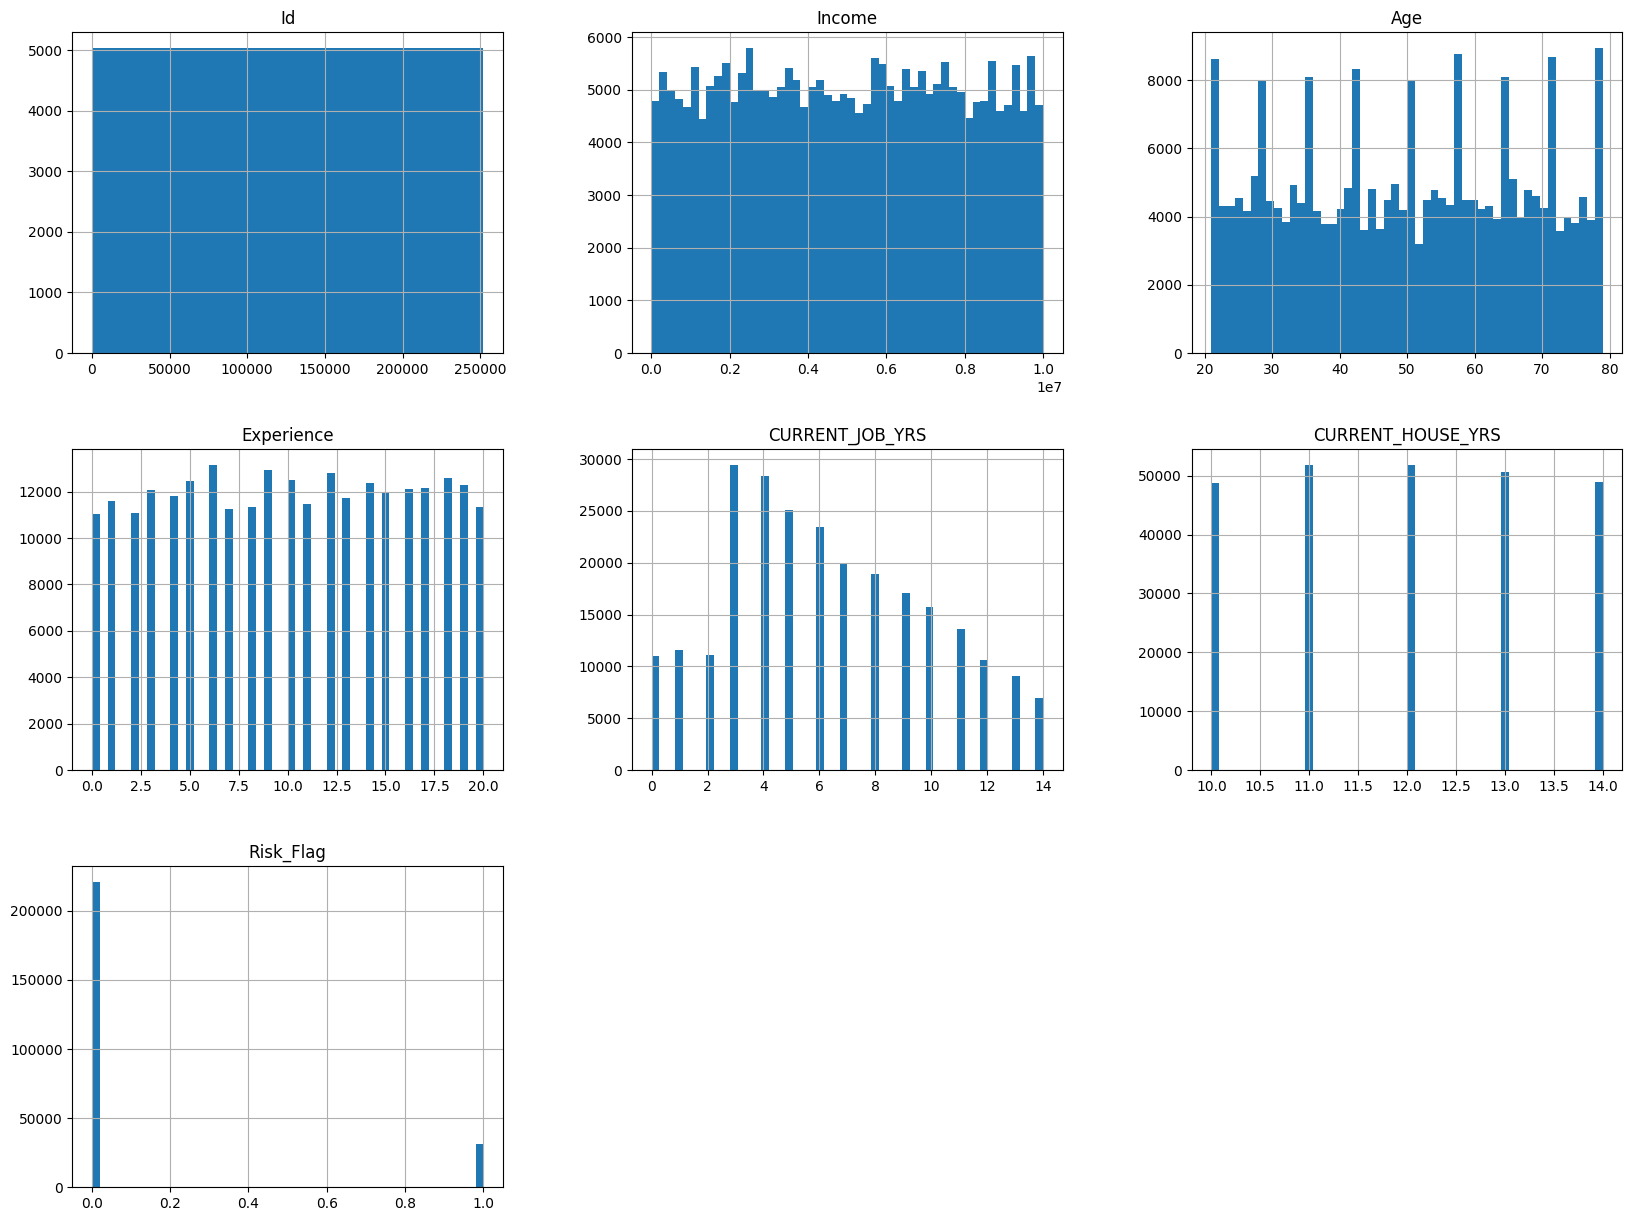

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
sample_data.hist(bins=50,figsize=(20,15))

In [31]:
print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(sample_data.columns)

print("\n\nNumber of Instances in Sample Data:",sample_data["Income"].count())
print("========================================\n")



Attributes in Sample Data:

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


Number of Instances in Sample Data: 252000



In [32]:
# Drop Id Column because its not useful in prediction
sample_data = sample_data.drop("Id", axis=1)

# Labels

Married = pd.DataFrame({"Married/Single":["single","married"]})
House_Ownership = pd.DataFrame({"House_Ownership":["rented","owned","norent_noown"]})
Car_Ownership = pd.DataFrame({"Car_Ownership":["no","yes"]})
Profession=pd.DataFrame(sample_data['Profession'])
CITY=pd.DataFrame(sample_data['CITY'])
STATE=pd.DataFrame(sample_data['STATE'])

# Initialize the Label Encoders

Married_encoder = LabelEncoder()
House_Ownership_encoder = LabelEncoder()
Car_Ownership_encoder = LabelEncoder()
Profession_encoder=LabelEncoder()
CITY_encoder=LabelEncoder()
STATE_encoder=LabelEncoder()


# Train the Label Encoders

Married_encoder.fit(np.ravel(Married))
House_Ownership_encoder.fit(np.ravel(House_Ownership))
Car_Ownership_encoder.fit(np.ravel(Car_Ownership))
Profession_encoder.fit(np.ravel(sample_data['Profession']))
CITY_encoder.fit(np.ravel(sample_data['CITY']))
STATE_encoder.fit(np.ravel(sample_data['STATE']))

LabelEncoder()

In [33]:
sample_data_encoded_input = sample_data.copy()
original_sample_data = sample_data.copy()

# Transform Input Attributes into Numerical Representation

print("\n\nMarried/Single Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_married"] = Married_encoder.transform(sample_data['Married/Single'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["Married/Single", "encoded_married"]].head(10))

print("\n\nHouse_Ownership Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_house_ownership"] = House_Ownership_encoder.transform(sample_data['House_Ownership'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["House_Ownership", "encoded_house_ownership"]].head(10))

print("\n\nCar_Ownership Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_car_ownership"] = Car_Ownership_encoder.transform(sample_data['Car_Ownership'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["Car_Ownership", "encoded_car_ownership"]].head(10))

print("\n\nProfession Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_profession"] = Profession_encoder.transform(sample_data['Profession'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["Profession", "encoded_profession"]].head(10))


print("\n\nCITY Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_city"] = CITY_encoder.transform(sample_data['CITY'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["CITY", "encoded_city"]].head(10))


print("\n\nSTATE Attribute After Label Encoding:")
print("======================================\n")
sample_data["encoded_state"] = STATE_encoder.transform(sample_data['STATE'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data[["STATE", "encoded_state"]].head(10))



# Print Original and Encoded Sample Data

sample_data_encoded_input[['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']] = sample_data[['encoded_married', 'encoded_house_ownership', 'encoded_car_ownership','encoded_profession','encoded_city','encoded_state']]
print("\n\nOriginal Sample Data:")
print("=====================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(original_sample_data.head(10))
print("\n\nSample Data after Label Encoding:")
print("=================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data_encoded_input.head(10))

# Save the Transformed Features into CSV File

sample_data_encoded_input.to_csv(r'sample-data-encoded.csv', index = False, header = True)



Married/Single Attribute After Label Encoding:

  Married/Single  encoded_married
0         single                1
1         single                1
2        married                0
3         single                1
4         single                1
5         single                1
6        married                0
7         single                1
8         single                1
9         single                1


House_Ownership Attribute After Label Encoding:

  House_Ownership  encoded_house_ownership
0          rented                        2
1          rented                        2
2          rented                        2
3          rented                        2
4          rented                        2
5          rented                        2
6          rented                        2
7          rented                        2
8          rented                        2
9          rented                        2


Car_Ownership Attribute After Label Encoding:

  C

In [34]:
training_data_encoded, testing_data_encoded = train_test_split( sample_data_encoded_input , test_size=0.2 , random_state=0 , shuffle = False)


# Save the Training and Testing Data into CSV File

training_data_encoded.to_csv(r'training-data-encoded.csv', index = False, header = True)
testing_data_encoded.to_csv(r'testing-data-encoded.csv', index = False, header = True)

# print Training and Testing Data

print("\n\nTraining Data:")
print("==============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(training_data_encoded.head(20))
print("\n\nTesting Data:")
print("==============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(testing_data_encoded.head(20))



Training Data:

     Income  Age  Experience  Married/Single  House_Ownership  Car_Ownership  \
0   1303834   23           3               1                2              0   
1   7574516   40          10               1                2              0   
2   3991815   66           4               0                2              0   
3   6256451   41           2               1                2              1   
4   5768871   47          11               1                2              0   
5   6915937   64           0               1                2              0   
6   3954973   58          14               0                2              0   
7   1706172   33           2               1                2              0   
8   7566849   24          17               1                2              1   
9   8964846   23          12               1                2              0   
10  4634680   78           7               1                2              0   
11  6623263   22      

**Display Training and Testing Data By Using Matplotlib**

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>],
       [<Axes: title={'center': 'Married/Single'}>,
        <Axes: title={'center': 'House_Ownership'}>,
        <Axes: title={'center': 'Car_Ownership'}>],
       [<Axes: title={'center': 'Profession'}>,
        <Axes: title={'center': 'CITY'}>,
        <Axes: title={'center': 'STATE'}>],
       [<Axes: title={'center': 'CURRENT_JOB_YRS'}>,
        <Axes: title={'center': 'CURRENT_HOUSE_YRS'}>,
        <Axes: title={'center': 'Risk_Flag'}>]], dtype=object)

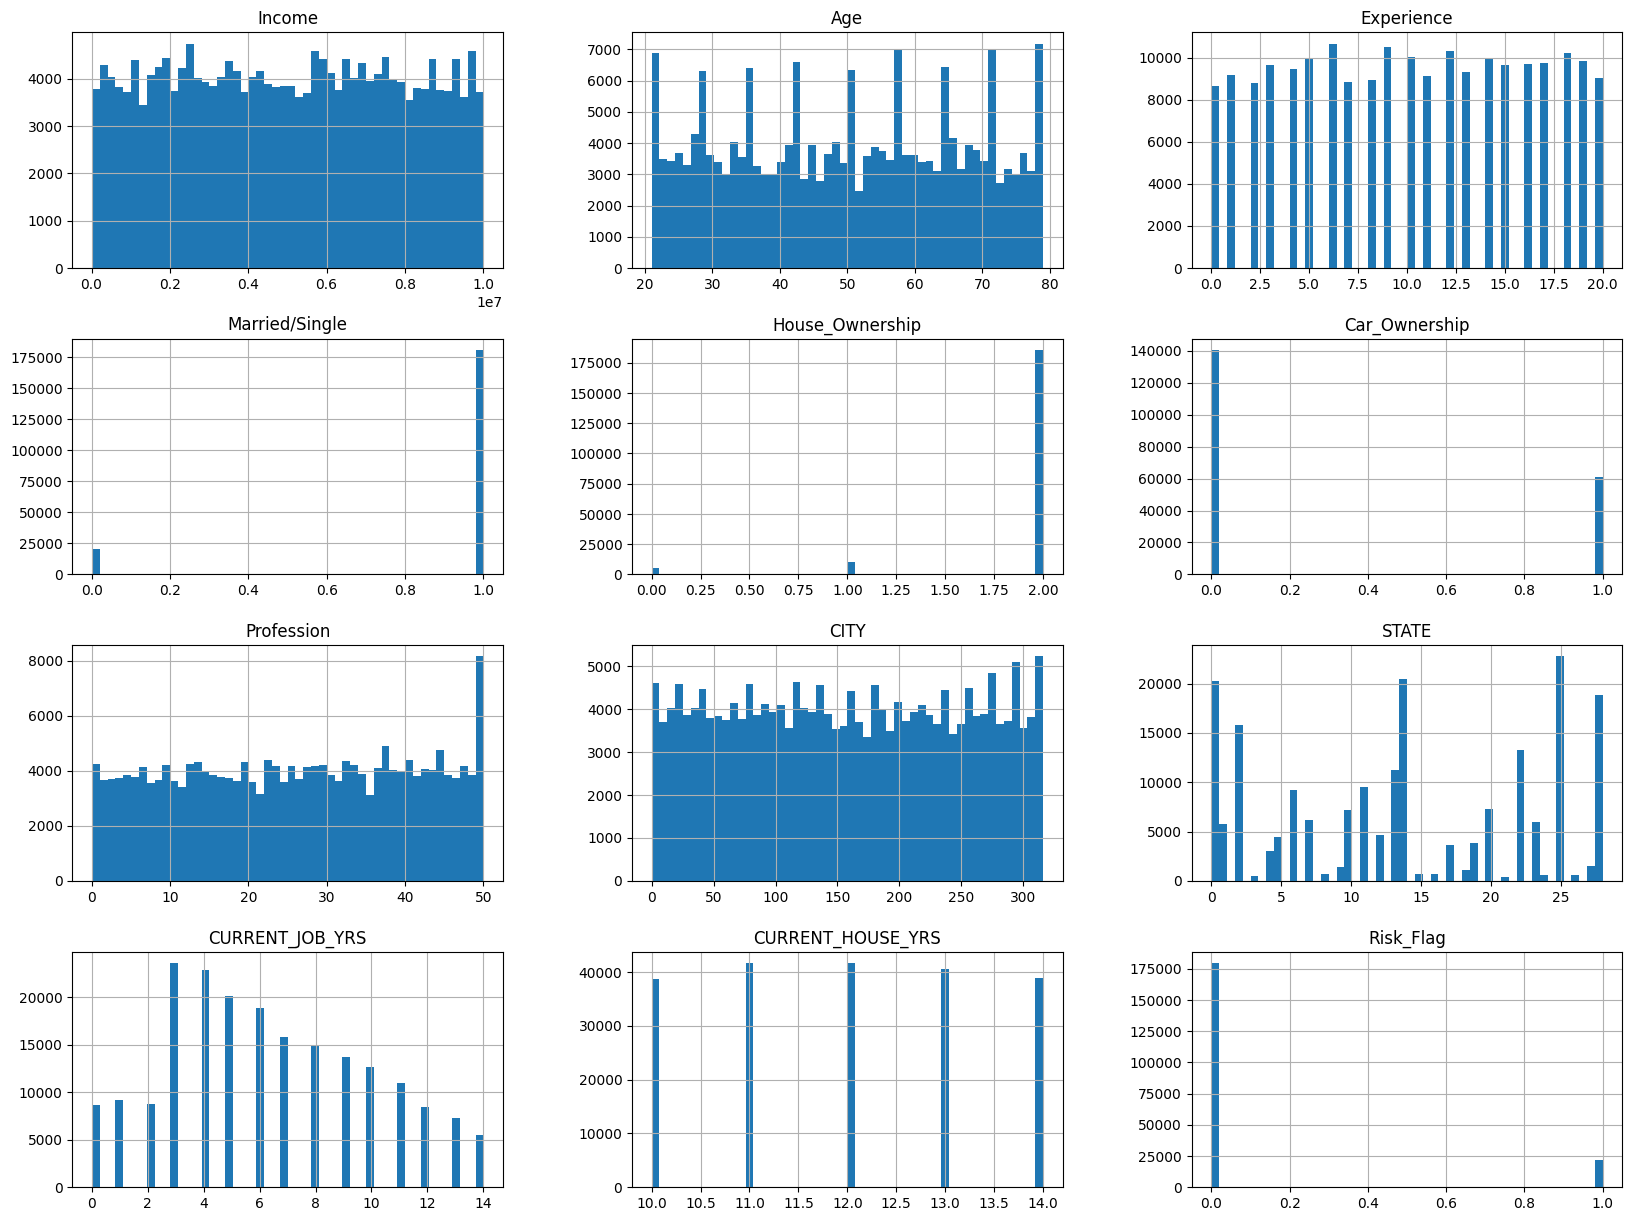

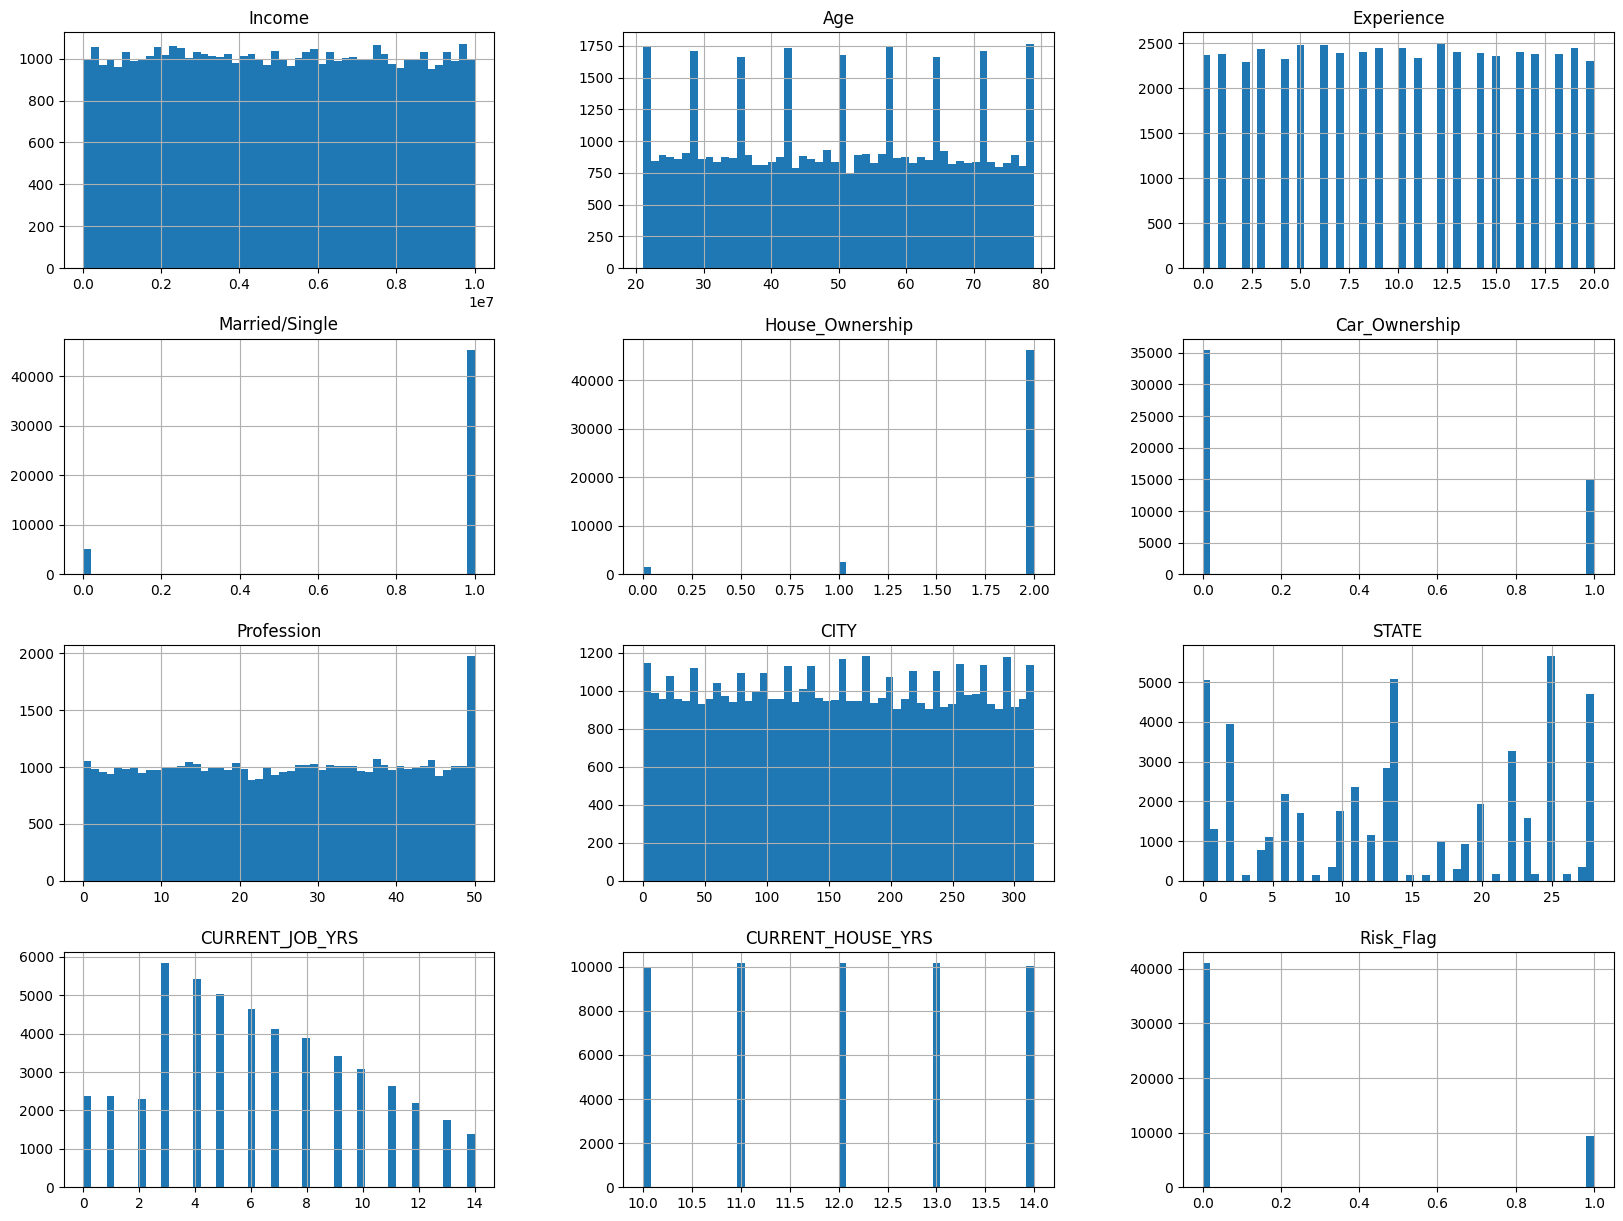

In [35]:
%matplotlib inline
training_data_encoded.hist(bins=50,figsize=(20,15))
testing_data_encoded.hist(bins=50,figsize=(20,15))

In [36]:

print("\n\nInputs Vectors (Feature Vectors) of Training Data:")
print("==================================================\n")
input_vector_train = training_data_encoded.iloc[: , :-1]
print(input_vector_train.head(50))

print("\n\nOutputs/Labels of Training Data:")
print("================================\n")
print("Risk Flag")
output_label_train = training_data_encoded.iloc[: ,-1]
print(output_label_train.head(50))



Inputs Vectors (Feature Vectors) of Training Data:

     Income  Age  Experience  Married/Single  House_Ownership  Car_Ownership  \
0   1303834   23           3               1                2              0   
1   7574516   40          10               1                2              0   
2   3991815   66           4               0                2              0   
3   6256451   41           2               1                2              1   
4   5768871   47          11               1                2              0   
5   6915937   64           0               1                2              0   
6   3954973   58          14               0                2              0   
7   1706172   33           2               1                2              0   
8   7566849   24          17               1                2              1   
9   8964846   23          12               1                2              0   
10  4634680   78           7               1                2     

In [37]:
print("\n\nTraining the Support Vector Classifier on Training Data")
print("========================================================\n")
print("\nParameters and their values:")
print("============================\n")
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=0)
logreg_model.fit(input_vector_train, np.ravel(output_label_train))
print(logreg_model)






Training the Support Vector Classifier on Training Data


Parameters and their values:

LogisticRegression(random_state=0)


In [38]:

print("\n\nInputs Vectors (Feature Vectors) of Testing Data:")
print("=================================================\n")
input_vector_test = testing_data_encoded.iloc[: , :-1]
print(input_vector_test.head(50))

print("\n\nOutputs/Labels of Testing Data:")
print("==============================\n")
print("  Risk Flag")
output_label_test = testing_data_encoded.iloc[: ,-1]
print(output_label_test.head(50))



Inputs Vectors (Feature Vectors) of Testing Data:

         Income  Age  Experience  Married/Single  House_Ownership  \
201600  9532596   50          12               1                2   
201601  7488205   60           9               1                2   
201602  6662756   78           7               1                2   
201603  3640092   65           2               1                2   
201604  2241295   53          17               1                2   
201605  8217682   67          10               1                0   
201606  5776771   54          19               1                2   
201607  3773977   69          13               1                2   
201608  3417372   35          16               1                2   
201609  9910826   79           8               1                2   
201610  5943449   49           3               1                2   
201611  4872099   36           1               1                2   
201612  7567364   58          15               1  

In [39]:

# Save the Model in a Pkl File

pickle.dump(logreg_model, open('logreg_trained_model.pkl', 'wb'))

In [40]:


# Load the Saved Model

model = pickle.load(open('logreg_trained_model.pkl', 'rb'))


In [41]:
# Provide Test data to the Trained Model

model_predictions = model.predict(input_vector_test)
testing_data_encoded.copy(deep=True)
pd.options.mode.chained_assignment = None
testing_data_encoded["Predictions"] = model_predictions

# Save the Predictions into CSV File

testing_data_encoded.to_csv(r'model-predictions.csv', index = False, header = True)

model_predictions = testing_data_encoded
print("\n\nPredictions Returned by svc_trained_model:")
print("==========================================\n")
print(model_predictions.head(200))



Predictions Returned by svc_trained_model:

         Income  Age  Experience  Married/Single  House_Ownership  \
201600  9532596   50          12               1                2   
201601  7488205   60           9               1                2   
201602  6662756   78           7               1                2   
201603  3640092   65           2               1                2   
201604  2241295   53          17               1                2   
201605  8217682   67          10               1                0   
201606  5776771   54          19               1                2   
201607  3773977   69          13               1                2   
201608  3417372   35          16               1                2   
201609  9910826   79           8               1                2   
201610  5943449   49           3               1                2   
201611  4872099   36           1               1                2   
201612  7567364   58          15               1         

In [42]:
# Calculate the Accuracy
model_accuracy_score = accuracy_score(model_predictions["Risk_Flag"],model_predictions["Predictions"])

print("\n\nAccuracy Score:")
print("===============\n")
print(round(model_accuracy_score,2))



Accuracy Score:

0.82


In [43]:
# Take Input from User

'''
*---------------- TAKE_USER_INPUT ----------------*
'''
income_input = input("\nPlease enter Income here: ").strip()
age_input = input("\nPlease enter Age: ").strip()
experience_input = input("\nPlease enter Experience: ").strip()
married_input = input("\nPlease enter Married/Single here (married,single) : ").strip()
house_input = input("\nPlease enter House_Ownership here (rented,norent_noown,owned) : ").strip()
car_input = input("\nPlease enter Car_Ownership here (no,yes) : ").strip()

# Profession have a lot of values
print("\nPlease select a profession from the following options:")
column_values = sample_data['Profession'].unique().tolist()
print(column_values)
profession_input = input("Please enter Profession here: ").strip()

# City have a lot of values
print("\nPlease select a CITY from the following options:")
column_values1 = sample_data['CITY'].unique().tolist()
print(column_values1)
city_input = input("Please enter CITY here: ").strip()

# STATE have a lot of values
print("\nPlease select a STATE from the following options:")
column_values2 = sample_data['STATE'].unique().tolist()
print(column_values2)
state_input = input("Please enter STATE here: ").strip()

jobyears_input = input("\nPlease enter CURRENT_JOB_YRS here: ").strip()
houseyears_input = input("\nPlease enter CURRENT_House_YRS here: ").strip()


Please enter Income here: 30493434

Please enter Age: 23

Please enter Experience: 2

Please enter Married/Single here (married,single) : married

Please enter House_Ownership here (rented,norent_noown,owned) : rented

Please enter Car_Ownership here (no,yes) : no

Please select a profession from the following options:
['Mechanical_engineer', 'Software_Developer', 'Technical_writer', 'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant', 'Architect', 'Designer', 'Physician', 'Financial_Analyst', 'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist', 'Surveyor', 'Design_Engineer', 'Chemical_engineer', 'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer', 'Graphic_Designer', 'Computer_hardware_engineer', 'Petroleum_Engineer', 'Secretary', 'Computer_operator', 'Chartered_Accountant', 'Technician', 'Microbiologist', 'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate', 'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst', 'Geologist', 'Drafter', 

In [44]:
# Convert User Input into Feature Vector

user_input = pd.DataFrame({'Income':[income_input],'Age':[age_input],'Experience':[experience_input], 'Married/Single': [married_input],'House_Ownership': [house_input],'Car_Ownership': [car_input],'Profession': [profession_input],'CITY': [city_input],'STATE': [state_input],'CURRENT_JOB_YRS':[jobyears_input],'CURRENT_HOUSE_YRS':[houseyears_input]})

print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)



User Input Feature Vector:

     Income Age Experience Married/Single House_Ownership Car_Ownership  \
0  30493434  23          2        married          rented            no   

  Profession     CITY    STATE CURRENT_JOB_YRS CURRENT_HOUSE_YRS  
0  Librarian  Jalgaon  Gujarat               3                 1  


In [45]:
# Transform Input (Categorical) Attributes of Unseen Data into Numerical Representation

unseen_data_features = user_input.copy()
unseen_data_features["Married/Single"] = Married_encoder.transform(user_input['Married/Single'])
unseen_data_features["House_Ownership"] = House_Ownership_encoder.transform(user_input['House_Ownership'])
unseen_data_features["Car_Ownership"] = Car_Ownership_encoder.transform(user_input['Car_Ownership'])
unseen_data_features["Profession"] = Profession_encoder.transform(user_input['Profession'])
unseen_data_features["CITY"] = CITY_encoder.transform(user_input['CITY'])
unseen_data_features["STATE"] = STATE_encoder.transform(user_input['STATE'])

print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)

print("\n\nUser Input Encoded Feature Vector:")
print("==================================\n")
print(unseen_data_features)



User Input Feature Vector:

     Income Age Experience Married/Single House_Ownership Car_Ownership  \
0  30493434  23          2        married          rented            no   

  Profession     CITY    STATE CURRENT_JOB_YRS CURRENT_HOUSE_YRS  
0  Librarian  Jalgaon  Gujarat               3                 1  


User Input Encoded Feature Vector:

     Income Age Experience  Married/Single  House_Ownership  Car_Ownership  \
0  30493434  23          2               0                2              0   

   Profession  CITY  STATE CURRENT_JOB_YRS CURRENT_HOUSE_YRS  
0          31   130      6               3                 1  


In [46]:

# Load the Saved Model

model = pickle.load(open('logreg_trained_model.pkl', 'rb'))

In [47]:


# Make a Prediction on Unseen Data


predicted_risk_flag = model.predict(unseen_data_features)

if(predicted_risk_flag == 1):
    prediction = "HIGH RISK"
if(predicted_risk_flag == 0):
    prediction = "LOW RISK"

# Add the Prediction in a Pretty Table

pretty_table = PrettyTable()
pretty_table.add_column("       ** Prediction **       ",[prediction])
print(pretty_table)

+--------------------------------+
|        ** Prediction **        |
+--------------------------------+
|            LOW RISK            |
+--------------------------------+


**After some time, take Feedback from
 Domain Experts and Users on deployed Loan Prediction Based on Customer**

Feedback from domain experts and users allows us to make necessary refinements and enhancements to ensure the system's accuracy, usability, and user satisfaction. It is an iterative process that helps us continuously improve the system and provide more accurate predictions for future Loan Prediction on Customer Behaviour.


**Make a List of Possible Improvements based on Feedback received**
- Enhance prediction accuracy using multiple algorithm
- Include additional relevant features (like add more cutomer demographic to predict and financial history also included)
- Improve user interface (When deployed the model as Interface so make more learnability and ease to use)
- Handle missing data effectively( like take mean/Mode/median or delete those rows which have containe null values)
- Regularly update the model with new data
- Conduct performance evaluation
- Implement proper error handling and validation





==========================================================
        JAZAK ALLAH KHAIR
==========================================================